# ***THE SPARKS FOUNDATIONS***
## Data Science & Business Analytics Tasks
## TASK - 1 : Prediction using Supervised ML
### ***Name : Sudhanshu***

#### IMPORTING THE LIBRARIES 

In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

#### DATA READING

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### SUMMARY OF DATA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### SCATTER PLOT

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

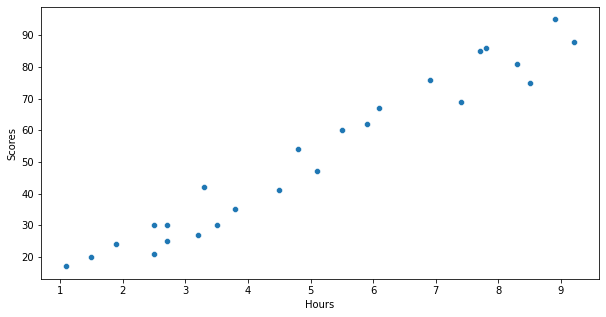

In [5]:
plt.figure(figsize = (10,5))
sns.scatterplot(data['Hours'],data['Scores'])

#### * We use corr() function to compute pairwise correlation of columns in the dataframe.

In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### * POSITIVELY CORRELATED

<AxesSubplot:>

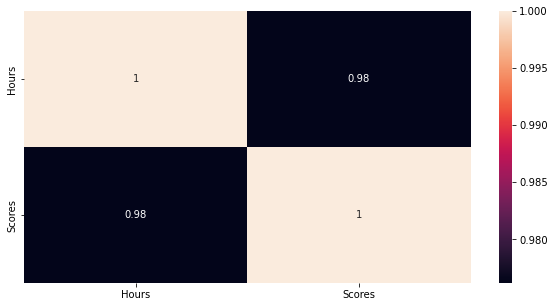

In [7]:
plt.figure(figsize =(10,5))
sns.heatmap(data.corr(),annot = True)

### * SPLITING THE DATA

In [8]:
#Creating feature and target arrays
x = data.drop("Scores", axis=1).values
y = data["Scores"].values

In [9]:
from sklearn.model_selection import train_test_split

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [10]:
x_train.shape , y_train.shape

((17, 1), (17,))

In [11]:
x_test.shape , y_test.shape

((8, 1), (8,))

### * PLOT OUR TRAIN AND TEST SETS

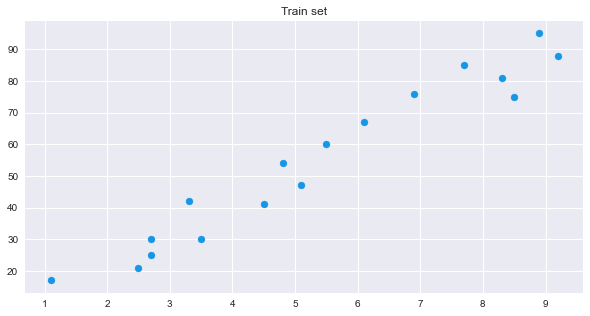

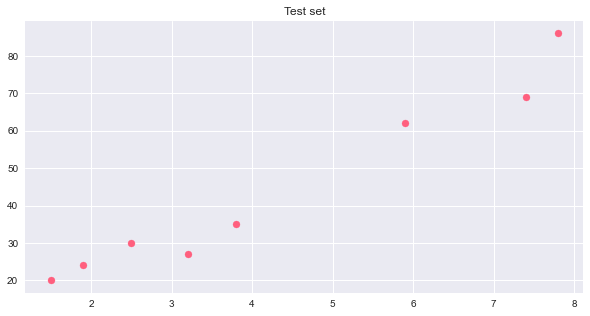

In [12]:
plt.style.use("seaborn")
plt.figure(figsize=(10,5))
plt.title("Train set")
plt.scatter(x_train, y_train, c="#1597E5")

plt.figure(figsize=(10,5))
plt.title("Test set")
plt.scatter(x_test, y_test, c="#FF5F7E")

### * FITTING DATA INTO MODEL

In [13]:
# Train our model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
print('---MODEL TRAINED---')


---MODEL TRAINED---


### * PRED vs ACTUAL

In [14]:
y_pred = model.predict(x_test)

In [15]:
pred = pd.DataFrame({'Actual': y_test, 'Pred': y_pred})
pred

,Actual,Pred
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### * EVALUATE OUR MODEL

In [16]:

from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  22.96509721270043
R2 Score:  0.9568211104435257


##### The Mean square error should be as close to zero as possible and the R2 Score should be as close as to 1 as possible. 

In [17]:
print('Slope :', model.coef_)
print('Intercept :',model.intercept_)

print('The line is of the form "y = ({:.3f}) * x + {:.3f}"'.format(model.coef_[0], model.intercept_))

Slope : [9.78856669]
Intercept : 2.370815382341881
The line is of the form "y = (9.789) * x + 2.371"


### * PLOT OUT PREDICTIONS

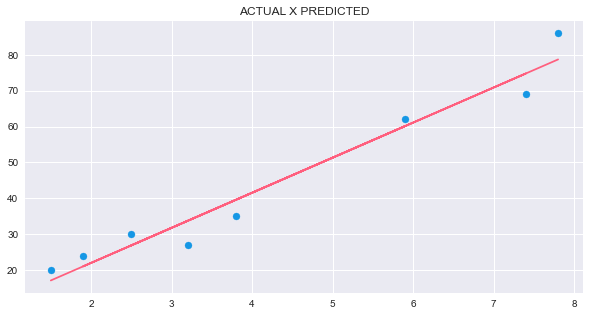

In [18]:
plt.figure(figsize=(10,5))
plt.title("ACTUAL X PREDICTED")
plt.scatter(x_test, y_test, c="#1597E5")
plt.plot(x_test, y_pred, c="#FF5F7E")

### * What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
Hours = 9.25
Hrs = np.array(Hours).reshape(-1,1)  
pred = model.predict(Hrs)

print('No. of Hours = {}'.format(Hours))
print('Pred Score = {}'.format(round(pred[0],3)))

No. of Hours = 9.25
Pred Score = 92.915


##### ACCORDING TO THIS MODEL : IF A STUDENT STUDIES FOR 9.25hrs A DAY HE IS LIKELY TO SCORE 92.915